## 사전 훈련된 단어 임베딩 사용하기 : GloVe 임베딩

- 코드 출처: 케라스 창시자에게 배우는 딥러닝

### 원본 IMDB 텍스트 내려받기
- http://mng.bz/0tIo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate http://mng.bz/0tIo

--2020-10-24 09:26:26--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-10-24 09:26:26--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-10-24 09:26:26--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.99.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.99.182|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  34.4MB/s    in 1.7s    

2020-10-24 09:26:28 (34.4 MB/s) - ‘0tIo’ saved [60711700/60711700]

In [3]:
!mkdir '/content/dataset'
!unzip '/content/0tIo' -d '/content/dataset'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/dataset/aclImdb/train/pos/7755_9.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: /content/dataset/aclImdb/train/pos/7756_10.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: /content/dataset/aclImdb/train/pos/7757_9.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: /content/dataset/aclImdb/train/pos/7758_7.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: /content/dataset/aclImdb/train/pos/7759_10.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: /content/dataset/aclImdb/train/pos/775_7.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: /content/dataset/aclImdb/train/pos/7760_10.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: /content/dataset

In [4]:
import os

In [5]:
imdb_dir = '/content/dataset/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels=[]
texts=[]
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)

  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      
      else:
        labels.append(1)

In [6]:
texts[0]

'Come on. The new twist is nearly ok, but from avenging the Elm Street children Freddy is just killing people now. More of the same: Special effects with no actual character development or anything. Simply bad and insulting. SCARY..? Nope. Not at all. Just bad.'

In [7]:
labels[0]

0

### 데이터 토큰화

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
max_len = 100
training_samples = 300
validation_samples = 10000
max_words = 10000

In [10]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [11]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [12]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [13]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(300, 100)
(300,)
(10000, 100)
(10000,)


### GloVe 단어 임베딩 내려받기

- https://nlp.stanford.edu/projects/glove

- http://nlp.stanford.edu/data/glove.6B.zip

- 시간 소요 (5~7m)

In [15]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip

--2020-10-24 09:27:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-24 09:27:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-24 09:27:08--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [16]:
!mkdir '/content/dataset/glove'
!unzip '/content/glove.6B.zip' -d '/content/dataset/glove'

Archive:  /content/glove.6B.zip
  inflating: /content/dataset/glove/glove.6B.50d.txt  
  inflating: /content/dataset/glove/glove.6B.100d.txt  
  inflating: /content/dataset/glove/glove.6B.200d.txt  
  inflating: /content/dataset/glove/glove.6B.300d.txt  


### 임베딩 전처리
- GloVe 파싱

In [17]:
glove_dir = '/content/dataset/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close

print(len(embeddings_index))

400000


In [18]:
embedding_dim = 100

embedding_mat = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_mat[i] = embedding_vector

In [19]:
embedding_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.54539001, -0.31817999, -0.016281  , ..., -0.44865   ,
         0.067047  ,  0.17975999],
       [ 0.73422003,  0.55528998,  0.0028232 , ...,  0.25650999,
        -0.58311999,  0.46452999],
       [ 0.16203   , -0.36067   , -0.43961   , ...,  0.64737999,
        -0.25510001, -0.16252001]])

### 모델 정의

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

## 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련

- training_samples : 300

In [21]:
max_len = 100
training_samples = 300
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [22]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [23]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [24]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(300, 100)
(300,)
(10000, 100)
(10000,)


In [26]:
model2 = Sequential()

model2.add(Embedding(max_words, embedding_dim, input_length=max_len))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history2 = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/10
10/10 [==============================] - 1s 81ms/step - loss: 0.6955 - acc: 0.4633 - val_loss: 0.6944 - val_acc: 0.5107
Epoch 2/10
10/10 [==============================] - 1s 68ms/step - loss: 0.4850 - acc: 0.9767 - val_loss: 0.7025 - val_acc: 0.5048
Epoch 3/10
10/10 [==============================] - 1s 67ms/step - loss: 0.2292 - acc: 0.9967 - val_loss: 0.7158 - val_acc: 0.5078
Epoch 4/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0832 - acc: 1.0000 - val_loss: 0.7254 - val_acc: 0.5061
Epoch 5/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0361 - acc: 1.0000 - val_loss: 0.7431 - val_acc: 0.5091
Epoch 6/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.7564 - val_acc: 0.5076
Epoch 7/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.7742 - val_acc: 0.5087
Epoch 8/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0041 - a

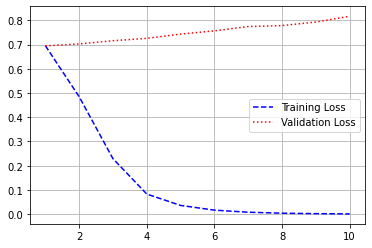

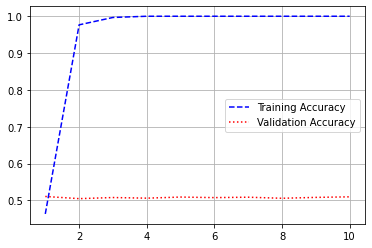

In [28]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='Training Loss')
plt.plot(epochs, val_loss, 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

- training_samples : 500

In [29]:
max_len = 100
training_samples = 500
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [30]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [31]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [32]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(500, 100)
(500,)
(10000, 100)
(10000,)


In [34]:
model3 = Sequential()

model3.add(Embedding(max_words, embedding_dim, input_length=max_len))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [35]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history3 = model3.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/10
16/16 [==============================] - 1s 52ms/step - loss: 0.6946 - acc: 0.4760 - val_loss: 0.6934 - val_acc: 0.5023
Epoch 2/10
16/16 [==============================] - 1s 46ms/step - loss: 0.4852 - acc: 0.9560 - val_loss: 0.7054 - val_acc: 0.5007
Epoch 3/10
16/16 [==============================] - 1s 45ms/step - loss: 0.1939 - acc: 0.9820 - val_loss: 0.7205 - val_acc: 0.5041
Epoch 4/10
16/16 [==============================] - 1s 44ms/step - loss: 0.0600 - acc: 1.0000 - val_loss: 0.7415 - val_acc: 0.5068
Epoch 5/10
16/16 [==============================] - 1s 44ms/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.7640 - val_acc: 0.5060
Epoch 6/10
16/16 [==============================] - 1s 45ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.8018 - val_acc: 0.5026
Epoch 7/10
16/16 [==============================] - 1s 44ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.8141 - val_acc: 0.5053
Epoch 8/10
16/16 [==============================] - 1s 43ms/step - loss: 9.7205e-04

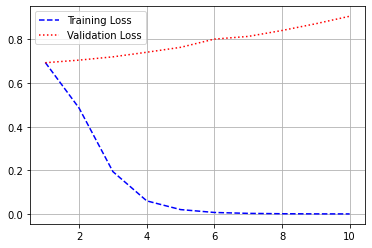

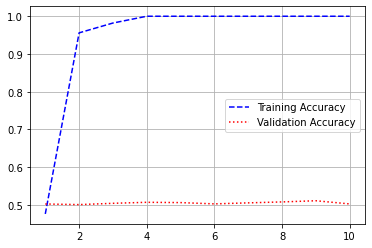

In [36]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
acc = history3.history['acc']
val_acc = history3.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='Training Loss')
plt.plot(epochs, val_loss, 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

- training_samples : 1000

In [37]:
max_len = 100
training_samples = 1000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [38]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [39]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [40]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1000, 100)
(1000,)
(10000, 100)
(10000,)


In [42]:
model4 = Sequential()

model4.add(Embedding(max_words, embedding_dim, input_length=max_len))
model4.add(Flatten())
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [43]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history4 = model4.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/10
32/32 [==============================] - 1s 30ms/step - loss: 0.6960 - acc: 0.4650 - val_loss: 0.6939 - val_acc: 0.4966
Epoch 2/10
32/32 [==============================] - 1s 26ms/step - loss: 0.4670 - acc: 0.9560 - val_loss: 0.7229 - val_acc: 0.4925
Epoch 3/10
32/32 [==============================] - 1s 27ms/step - loss: 0.1389 - acc: 0.9960 - val_loss: 0.7800 - val_acc: 0.5013
Epoch 4/10
32/32 [==============================] - 1s 26ms/step - loss: 0.0258 - acc: 1.0000 - val_loss: 0.8875 - val_acc: 0.5021
Epoch 5/10
32/32 [==============================] - 1s 26ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.8994 - val_acc: 0.4907
Epoch 6/10
32/32 [==============================] - 1s 26ms/step - loss: 9.7979e-04 - acc: 1.0000 - val_loss: 0.9716 - val_acc: 0.4952
Epoch 7/10
32/32 [==============================] - 1s 26ms/step - loss: 1.7337e-04 - acc: 1.0000 - val_loss: 1.0394 - val_acc: 0.4967
Epoch 8/10
32/32 [==============================] - 1s 26ms/step - loss: 3.

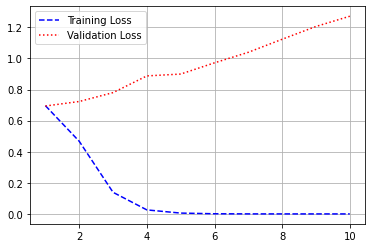

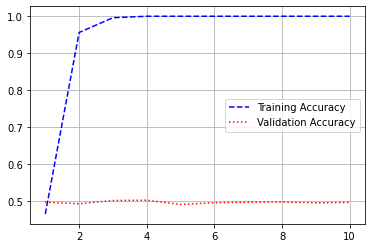

In [44]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
acc = history4.history['acc']
val_acc = history4.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='Training Loss')
plt.plot(epochs, val_loss, 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

- training_samples : 2000

In [45]:
max_len = 100
training_samples = 2000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [46]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [47]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [48]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(2000, 100)
(2000,)
(10000, 100)
(10000,)


In [50]:
model5 = Sequential()

model5.add(Embedding(max_words, embedding_dim, input_length=max_len))
model5.add(Flatten())
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [51]:
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history5 = model5.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/10
63/63 [==============================] - 1s 18ms/step - loss: 0.6941 - acc: 0.5140 - val_loss: 0.6937 - val_acc: 0.4966
Epoch 2/10
63/63 [==============================] - 1s 17ms/step - loss: 0.4731 - acc: 0.9240 - val_loss: 0.7573 - val_acc: 0.4932
Epoch 3/10
63/63 [==============================] - 1s 17ms/step - loss: 0.1166 - acc: 0.9895 - val_loss: 0.8431 - val_acc: 0.4958
Epoch 4/10
63/63 [==============================] - 1s 16ms/step - loss: 0.0177 - acc: 0.9990 - val_loss: 0.9592 - val_acc: 0.4983
Epoch 5/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0055 - acc: 0.9990 - val_loss: 1.0551 - val_acc: 0.4999
Epoch 6/10
63/63 [==============================] - 1s 16ms/step - loss: 9.2345e-04 - acc: 0.9995 - val_loss: 1.1640 - val_acc: 0.5002
Epoch 7/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0014 - acc: 0.9990 - val_loss: 1.2594 - val_acc: 0.5012
Epoch 8/10
63/63 [==============================] - 1s 17ms/step - loss: 7.1346

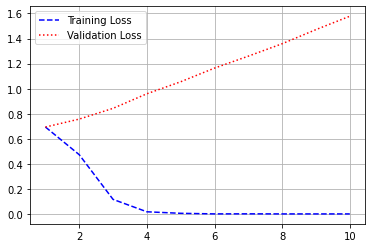

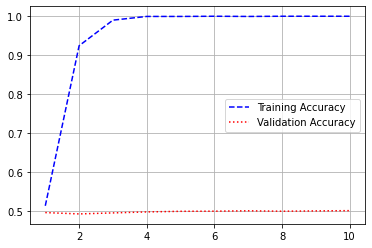

In [52]:
loss = history5.history['loss']
val_loss = history5.history['val_loss']
acc = history5.history['acc']
val_acc = history5.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='Training Loss')
plt.plot(epochs, val_loss, 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

- max_len : 200
- training_samples : 5000

In [54]:
max_len = 200
training_samples = 5000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [55]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 200)
(25000,)


In [56]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [57]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(5000, 200)
(5000,)
(10000, 200)
(10000,)


In [59]:
model6 = Sequential()

model6.add(Embedding(max_words, embedding_dim, input_length=max_len))
model6.add(Flatten())
model6.add(Dense(32, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

model6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


In [60]:
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history6 = model6.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6948 - acc: 0.5050 - val_loss: 0.6963 - val_acc: 0.5048
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 0.3915 - acc: 0.8616 - val_loss: 0.8373 - val_acc: 0.5084
Epoch 3/10
157/157 [==============================] - 2s 13ms/step - loss: 0.0501 - acc: 0.9946 - val_loss: 1.0766 - val_acc: 0.5079
Epoch 4/10
157/157 [==============================] - 2s 13ms/step - loss: 0.0124 - acc: 0.9988 - val_loss: 1.2914 - val_acc: 0.5105
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0071 - acc: 0.9988 - val_loss: 1.4429 - val_acc: 0.5139
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0022 - acc: 0.9990 - val_loss: 1.6477 - val_acc: 0.5125
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 0.0017 - acc: 0.9990 - val_loss: 1.8174 - val_acc: 0.5146
Epoch 8/10
157/157 [==============================] - 2s 13ms/step - 

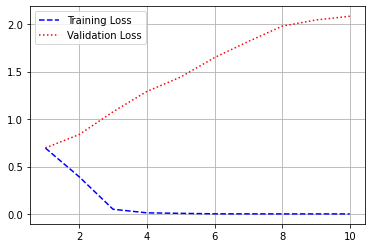

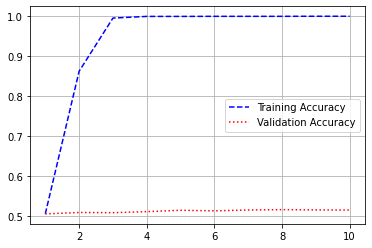

In [61]:
loss = history6.history['loss']
val_loss = history6.history['val_loss']
acc = history6.history['acc']
val_acc = history6.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='Training Loss')
plt.plot(epochs, val_loss, 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()